# Simple demo of PV environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2
from gridworld.agents.pv import PVEnv

[WARNING] multiagent_env.py:17: rllib MultiAgentEnv not found, using generic object class


In [3]:
# Create the environment.
env = PVEnv(
    name="pv",
    profile_csv="pv_profile.csv",
    scaling_factor=10.,
    rescale_spaces=False
)

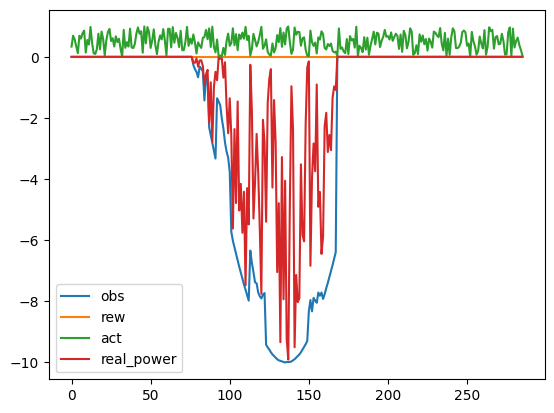

In [4]:
# Run one episode of the environment using random actions, and plot
# the trajectory.

done = False
env.reset()
df = []
while not done:
    action = env.action_space.sample()
    obs, rew, done, meta = env.step(action)
    df.append((float(obs), rew, float(action.squeeze()), env.real_power))
    
df = pd.DataFrame(df, columns=["obs", "rew", "act", "real_power"])
_ = df.plot()